<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,59.461146,-1.336585,117.355898,118.557278,-1.201380
1,0.0,1.0,44.635421,94.909802,-0.569572,148.975651,149.696671,-0.721020
2,0.0,2.0,72.942335,31.602524,0.848982,115.393842,114.062444,1.331398
3,0.0,3.0,21.852261,46.682635,-0.871152,77.663743,78.472507,-0.808764
4,0.0,4.0,80.441727,23.809022,-0.348185,113.902564,113.665945,0.236619
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.998446,26.688696,1.782581,61.469723,60.809124,0.660600
19996,999.0,16.0,25.115035,28.695471,2.381615,66.192122,64.878662,1.313460
19997,999.0,17.0,92.011158,29.492717,0.580582,132.084457,131.312926,0.771531
19998,999.0,18.0,81.549620,45.650457,-1.537625,135.662452,137.091091,-1.428639


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.231337  59.461146 -1.336585  117.355898  118.557278 -1.201380
      1.0    44.635421  94.909802 -0.569572  148.975651  149.696671 -0.721020
      2.0    72.942335  31.602524  0.848982  115.393842  114.062444  1.331398
      3.0    21.852261  46.682635 -0.871152   77.663743   78.472507 -0.808764
      4.0    80.441727  23.809022 -0.348185  113.902564  113.665945  0.236619
...                ...        ...       ...         ...         ...       ...
999.0 15.0   22.998446  26.688696  1.782581   61.469723   60.809124  0.660600
      16.0   25.115035  28.695471  2.381615   66.192122   64.878662  1.313460
      17.0   92.011158  29.492717  0.580582  132.084457  131.312926  0.771531
      18.0   81.549620  45.650457 -1.537625  135.662452  137.091091 -1.428639
      19.0   61.216803  36.631568 -0.939602  106.908769  108.184040 -1.275272

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.231337  59.461146 -1.336585  117.355898  118.557278 -1.201380
      1.0    44.635421  94.909802 -0.569572  148.975651  149.696671 -0.721020
      2.0    72.942335  31.602524  0.848982  115.393842  114.062444  1.331398
      3.0    21.852261  46.682635 -0.871152   77.663743   78.472507 -0.808764
      4.0    80.441727  23.809022 -0.348185  113.902564  113.665945  0.236619
...                ...        ...       ...         ...         ...       ...
999.0 15.0   22.998446  26.688696  1.782581   61.469723   60.809124  0.660600
      16.0   25.115035  28.695471  2.381615   66.192122   64.878662  1.313460
      17.0   92.011158  29.492717  0.580582  132.084457  131.312926  0.771531
      18.0   81.549620  45.650457 -1.537625  135.662452  137.091091 -1.428639
      19.0   61.216803  36.631568 -0.939602  106.908769  108.184040 -1.275272

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,59.461146,-1.336585,117.355898,118.557278,-1.201380
1,0.0,1.0,44.635421,94.909802,-0.569572,148.975651,149.696671,-0.721020
2,0.0,2.0,72.942335,31.602524,0.848982,115.393842,114.062444,1.331398
3,0.0,3.0,21.852261,46.682635,-0.871152,77.663743,78.472507,-0.808764
4,0.0,4.0,80.441727,23.809022,-0.348185,113.902564,113.665945,0.236619
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,22.998446,26.688696,1.782581,61.469723,60.809124,0.660600
19996,999.0,16.0,25.115035,28.695471,2.381615,66.192122,64.878662,1.313460
19997,999.0,17.0,92.011158,29.492717,0.580582,132.084457,131.312926,0.771531
19998,999.0,18.0,81.549620,45.650457,-1.537625,135.662452,137.091091,-1.428639


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.231337  59.461146 -1.336585  117.355898  118.557278 -1.201380
      1.0    44.635421  94.909802 -0.569572  148.975651  149.696671 -0.721020
      2.0    72.942335  31.602524  0.848982  115.393842  114.062444  1.331398
      3.0    21.852261  46.682635 -0.871152   77.663743   78.472507 -0.808764
      4.0    80.441727  23.809022 -0.348185  113.902564  113.665945  0.236619
...                ...        ...       ...         ...         ...       ...
999.0 15.0   22.998446  26.688696  1.782581   61.469723   60.809124  0.660600
      16.0   25.115035  28.695471  2.381615   66.192122   64.878662  1.313460
      17.0   92.011158  29.492717  0.580582  132.084457  131.312926  0.771531
      18.0   81.549620  45.650457 -1.537625  135.662452  137.091091 -1.428639
      19.0   61.216803  36.631568 -0.939602  106.908769  108.184040 -1.275272

[20000 rows x 6 columns]

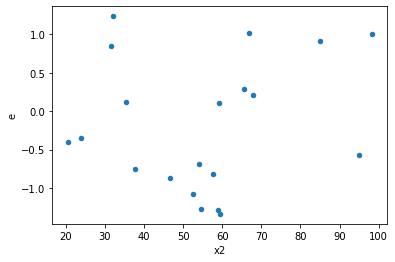

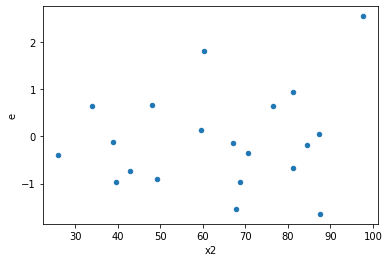

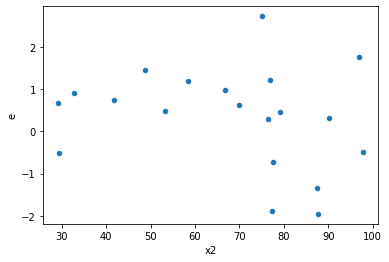

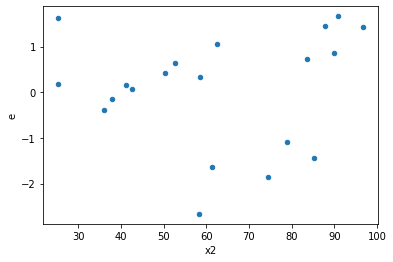

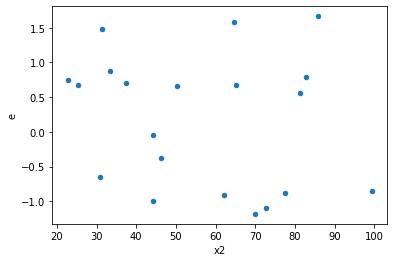

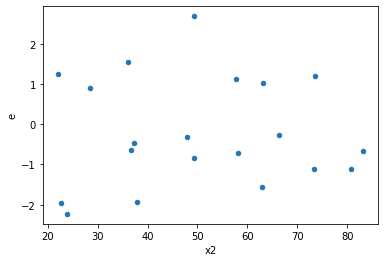

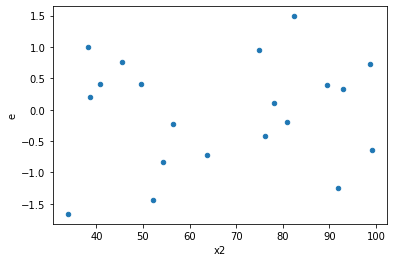

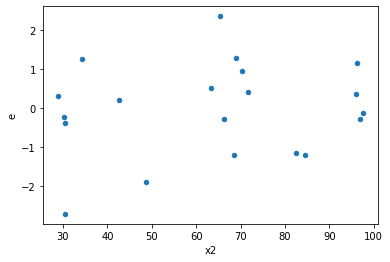

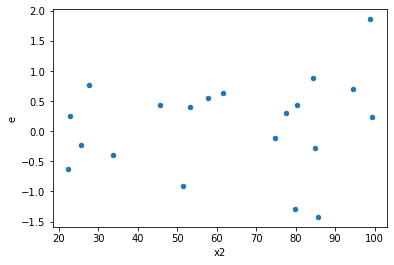

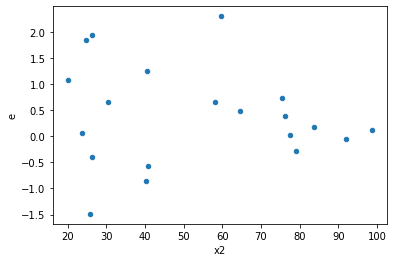

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,11.0,3.054050097194422,9.654475659723937,0.6108100194388844,0.8776796054294489,1.436910950209563,0.5713942319620342,0.7143028840189829,0.2856971159810171,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,6.231484046319379,7.937885564317374,0.8902120066170541,0.8819872849241527,0.9907609405043225,0.9860020416974655,0.5069989791512672,0.49300102084873276,Reject001=1 : Homoscedasticity
6.0,12.0,4.0,7.266904214516086,4.940829795234166,0.6055753512096739,1.2352074488085416,2.03972543852906,0.5137696565858638,0.7431151717070681,0.2568848282929319,Reject001=1 : Homoscedasticity
8.0,5.0,11.0,1.7395777667563348,5.728859657941801,0.34791555335126695,0.5208054234492546,1.496930558098483,0.5352645486435386,0.7323677256782307,0.2676322743217693,Reject001=1 : Homoscedasticity
10.0,7.0,9.0,6.775370925174952,12.570161465195099,0.9679101321678504,1.3966846072438999,1.4429899644874193,0.5952500669162244,0.7023749665418878,0.2976250334581122,Reject001=1 : Homoscedasticity
13.0,13.0,3.0,6.376526533940332,3.4274391898305416,0.49050204107233325,1.1424797299435139,2.3292048437674797,0.5291390689565212,0.7354304655217394,0.2645695344782606,Reject001=1 : Homoscedasticity
15.0,13.0,3.0,14.568043117002894,7.256608235495037,1.120618701307915,2.418869411831679,2.1585124440708765,0.5744818590660339,0.7127590704669831,0.28724092953301694,Reject001=1 : Homoscedasticity
16.0,10.0,6.0,6.806793369673237,4.8979453422151655,0.6806793369673236,0.8163242237025276,1.1992786902266663,0.8593264675701897,0.5703367662149051,0.42966323378509486,Reject001=1 : Homoscedasticity
17.0,13.0,3.0,5.562899334533792,2.208968398471964,0.4279153334256763,0.7363227994906546,1.7207207640727018,0.7245200137241876,0.6377399931379062,0.3622600068620938,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,11.0,3.054050097194422,9.654475659723937,0.6108100194388844,0.8776796054294489,1.436910950209563,0.5713942319620342,Reject001=1 : Homoscedasticity
1.0,7.0,9.0,12.296300718069665,3.481578043159866,1.7566143882956664,0.3868420047955407,0.2202202187190721,0.058608904002265115,Reject001=1 : Homoscedasticity
2.0,7.0,9.0,6.231484046319379,7.937885564317374,0.8902120066170541,0.8819872849241527,0.9907609405043225,0.9860020416974655,Reject001=1 : Homoscedasticity
3.0,11.0,5.0,12.230507136150992,4.103688296677052,1.1118642851046356,0.8207376593354103,0.7381635243892847,0.6251170744127319,Reject001=1 : Homoscedasticity
4.0,12.0,4.0,11.46679786415407,0.49265123079215045,0.9555664886795059,0.12316280769803761,0.12888983567039472,0.005008497413404388,Reject001=0 : Heteroscedasticity
5.0,10.0,6.0,17.90514337083093,9.951706525664227,1.7905143370830932,1.658617754277371,0.9263359247820414,0.8700298565844321,Reject001=1 : Homoscedasticity
6.0,12.0,4.0,7.266904214516086,4.940829795234166,0.6055753512096739,1.2352074488085416,2.03972543852906,0.5137696565858638,Reject001=1 : Homoscedasticity
7.0,6.0,10.0,8.573581378171701,10.65233357164691,1.4289302296952835,1.065233357164691,0.7454761156476127,0.7470958373527414,Reject001=1 : Homoscedasticity
8.0,5.0,11.0,1.7395777667563348,5.728859657941801,0.34791555335126695,0.5208054234492546,1.496930558098483,0.5352645486435386,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      933
Reject001=0 : Heteroscedasticity     67
Name: Result_test, dtype: int64